In [6]:
import matplotlib.pyplot as plt
import numpy as np

Mola nova

In [10]:
RPM_Motora2 = [1584,
               1571,
               1514,
               2487,
               2401,
               2454,
               3727,
               3743,
               3729]

RPM_Movida2 = [349,
               354,
               310,
               3026,
               2969,
               3074,
               4632,
               4659,
               4640]

print('Caso 2 - Mola velha sem carga')
relacao2 = [RPM_Motora2[i]/RPM_Movida2[i] for i in range(len(RPM_Motora2))]
Rmax2 = (relacao2[0] + relacao2[1] + relacao2[2])/3
RPM_Rmax2 = (RPM_Motora2[0] + RPM_Motora2[1] + RPM_Motora2[2])/3
print(f'Redução máxima: {Rmax2:.2f} a {RPM_Rmax2:.0f} RPM')

Rmin2 = (relacao2[3] + relacao2[4] + relacao2[5])/3
RPM_Rmin2 = (RPM_Motora2[3] + RPM_Motora2[4] + RPM_Motora2[5])/3
print(f'Redução mínima: {Rmin2:.2f} a {RPM_Rmin2:.0f} RPM')

print(f'Faixa de trabalho CVT: {RPM_Rmax2:.0f} a {RPM_Rmin2:.0f} RPM ({RPM_Rmin2 - RPM_Rmax2:.0f})')

RPM_F2 = (RPM_Motora2[-1]+RPM_Motora2[-2]+RPM_Motora2[-3])/3
print(f'RPM final: {RPM_F2:.0f}')

R_F2 = (relacao2[-1] + relacao2[-2] + relacao2[-3])/3
print(f'Relação à {RPM_F2:.0f} RPM: {R_F2:.2f}')

velocidade2 = [((0.377*0.25*RPM_Motora2[i])/(7.2*relacao2[i]))
               for i in range(len(RPM_Motora2))]
Vmax2 = (velocidade2[-1]+velocidade2[-2]+velocidade2[-3])/3

print(f'Velocidade máxima: {Vmax2:.2f} Km/h')

torque_Motor = [
    24.9,  # 2k
    26.5,  # 2,5k
    26,  # 3k
    22.5  # 3,6
]

f2k2 = ((2.7 * 7.2)*torque_Motor[0])/0.25
f25k2 = ((Rmin2 * 7.2)*torque_Motor[1])/0.25
f3k2 = ((Rmin2 * 7.2)*torque_Motor[2])/0.25
f36k2 = ((Rmin2 * 7.2)*torque_Motor[3])/0.25

print(f'Força na roda em 2000 RPM: {f2k2:.0f} N')
print(f'Força na roda em 2500 RPM: {f25k2:.0f} N')
print(f'Força na roda em 3000 RPM: {f3k2:.0f} N')
print(f'Força na roda em 3600 RPM: {f36k2:.0f} N')

print('Temperatura da correia no fim do teste: 71 ºC')

Caso 2 - Mola velha sem carga
Redução máxima: 4.62 a 1556 RPM
Redução mínima: 0.81 a 2447 RPM
Faixa de trabalho CVT: 1556 a 2447 RPM (891)
RPM final: 3733
Relação à 3733 RPM: 0.80
Velocidade máxima: 60.79 Km/h
Força na roda em 2000 RPM: 1936 N
Força na roda em 2500 RPM: 618 N
Força na roda em 3000 RPM: 606 N
Força na roda em 3600 RPM: 525 N
Temperatura da correia no fim do teste: 71 ºC


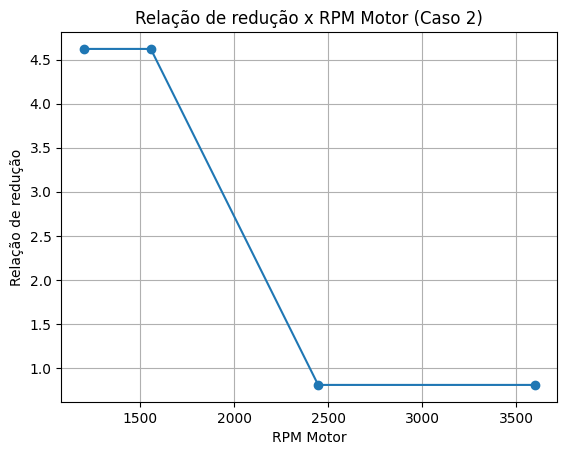

In [8]:
RPM_Motora_F2 = [1200, RPM_Rmax2, RPM_Rmin2, 3600]
Relacao_F2 = [Rmax2, Rmax2, Rmin2, Rmin2]

plt.plot(RPM_Motora_F2, Relacao_F2, 'o-', label='Caso 2')
plt.grid()
plt.xlabel('RPM Motor')
plt.ylabel('Relação de redução')
plt.title('Relação de redução x RPM Motor (Caso 2)')
plt.show()

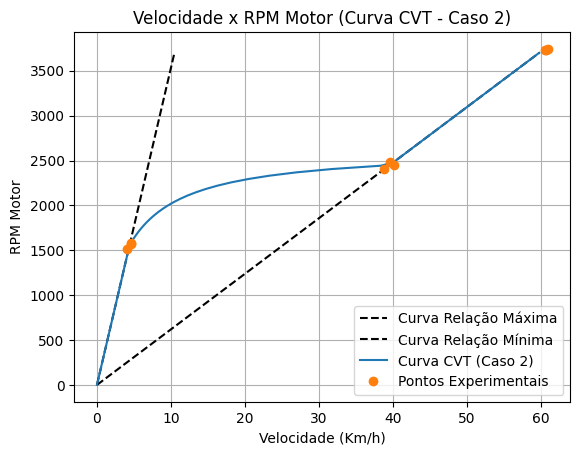

In [12]:
RPM = np.linspace(0, 3600, 101)


def rela2(RPM):
    if RPM <= RPM_Rmax2:
        return Rmax2
    else:
        if RPM <= RPM_Rmin2:
            a = (Rmax2-Rmin2)/(RPM_Rmax2-RPM_Rmin2)
            b = Rmax2-(RPM_Rmax2*a)
            return (a*RPM)+b
        else:
            return Rmin2


V_F2 = [((0.377*0.25*RPM_Motora_F2[i])/(7.2*Relacao_F2[i]))
        for i in range(len(RPM_Motora_F2))]

V2 = [((0.377*0.25*RPM[i])/(7.2*rela2(RPM[i])))
      for i in range(len(RPM))]

V_Rel_Max2 = [((0.377*0.25*RPM[i])/(7.2*Rmax2))
              for i in range(len(RPM))]

V_Rel_Min2 = [((0.377*0.25*RPM[i])/(7.2*Rmin2))
              for i in range(len(RPM))]

plt.plot(V_Rel_Max2, RPM, 'k--', label='Curva Relação Máxima')
plt.plot(V_Rel_Min2, RPM, 'k--', label='Curva Relação Mínima')
plt.plot(V2, RPM, '-', label='Curva CVT (Caso 2)')
plt.plot(velocidade2, RPM_Motora2, 'o', label='Pontos Experimentais')
plt.legend()
plt.grid()
plt.xlabel('Velocidade (Km/h)')
plt.ylabel('RPM Motor')
plt.title('Velocidade x RPM Motor (Curva CVT - Caso 2)')
plt.show()